## Setup Instructions
- You need to clone the entire repository for this notebook to run properly.
### Note: 
If you need later parts to support interactive dsiplay, please quit and run `jupyter nbextension enable --py widgetsnbextension` within your conda shell.

In [1]:
import numpy as np
import cv2, tifffile
import os
import logging

import ipywidgets as widgets
from ipywidgets import interact, fixed
from time import perf_counter

from src.src_pipeline import CalciumZero, Pipeline
from src.src_caiman import *

## Logging Setup

In [4]:
from datetime import datetime
log_folder = Path(os.getcwd()).joinpath("log")
log_folder.mkdir(exist_ok=True)
log_name = log_folder.joinpath(Path('log_' + datetime.now().strftime("%y%m%d_%H%M%S") + '.txt'))
logger = logging.getLogger('GUI')
logger.setLevel(logging.DEBUG)
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.DEBUG)
file_handler = logging.FileHandler(log_name)
file_handler.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s', datefmt='%y-%m-%d %H:%M:%S')
console_handler.setFormatter(formatter)
file_handler.setFormatter(formatter)
logger.addHandler(console_handler)
logger.addHandler(file_handler)

## Input Image Setup
Please change the following to your local input file path.

In [18]:
# For example, "E:/input1.tif"
path_input = "F:\case1 Movie_57_crop.tif"


## Parameters Setup
Change accordingly for different configurations to run the pipeline.

In [ ]:
params_dict = {
    # crop_run, stabilization_run, CaImAn_run
    'run': [True, True, True],
    'crop': {'margin': 200},
    'stabilizer': {
        'Transformation': 'Translation',  # or "Affine"
        'MAX_Pyramid_level': 1.0,
        'update_coefficient': 0.90,
        'MAX_iteration': 200,
        'error_tolerance': 1E-7
    },
    'caiman': {
        "mc_dict": {
            'fnames': [path_input],
            'fr': 10,                   # movie frame rate
            'decay_time': 0.4,          # length of a typical transient in seconds
            'pw_rigid': False,          # flag for performing piecewise-rigid motion correction (otherwise just rigid)
            'max_shifts': (5, 5),       # maximum allowed rigid shift
            'gSig_filt': (3, 3),        # size of high pass spatial filtering, used in 1p data
            'strides': (48, 48),         # start a new patch for pw-rigid motion correction every x pixels
            'overlaps': (24, 24),       # overlap between pathes (size of patch strides+overlaps)
            'max_deviation_rigid': 3,   # maximum deviation allowed for patch with respect to rigid shifts
            'border_nan': 'copy'        # replicate values along the boundaries
        },
        # parameters for source extraction and deconvolution
        "params_dict": {
            'method_init': 'corr_pnr',  # use this for 1 photon
            'K': 6,             # upper bound on number of components per patch, in general None
            'gSig': (3, 3),# gaussian width of a 2D gaussian kernel, which approximates a neuron
            'gSiz': (13, 13),# average diameter of a neuron, in general 4*gSig+1
            'merge_thr': .85,# merging threshold, max correlation allowed
            'p': 2,# order of the autoregressive system
            'tsub': 2,# downsampling factor in time for initialization, increase if you have memory problems
            'ssub': 1, # downsampling factor in space for initialization, increase if you have memory problems you can pass them here as boolean vectors
            'rf': 20,# half-size of the patches in pixels. e.g., if rf=40, patches are 80x80
            'stride': 10,# amount of overlap between the patches in pixels (keep it at least large as gSiz, i.e 4 times the neuron size gSig)
            'only_init': True,  # set it to True to run CNMF-E
            'nb': 0,# number of background components (rank) if positive,  else exact ring model with following settings: gnb= 0: Return background as b and W; gnb=-1: Return full rank background B; gnb<-1: Don't return background
            'nb_patch': 0,# number of background components (rank) per patch if gnb>0, else it is set automatically
            'method_deconvolution': 'oasis',  # could use 'cvxpy' alternatively
            'low_rank_background': None,# None leaves background of each patch intact, True performs global low-rank approximation if gnb>0
            'update_background_components': True,
            # sometimes setting to False improve the results
            'min_corr': .9,# min peak value from correlation image
            'min_pnr': 10,# min peak to noise ration from PNR image
            'normalize_init': False,  # just leave as is
            'center_psf': True,  # leave as is for 1 photon
            'ssub_B': 2,  # additional down-sampling factor in space for background
            'ring_size_factor': 1.4,  # radius of ring is gSiz*ring_size_factor
        }
    }
}

In [ ]:
cz = CalciumZero()
cz.run_instance = Pipeline()
cz.run_instance.update(param_dict=params_dict)
cz.run_instance.update(param_dict=params_dict)

## Run the pipeline

In [ ]:
st = perf_counter()

cz.run_instance.run()

et = perf_counter()
print(f"Task finishes. Total of {int((et - st) // 60)} m {int((et - st) % 60)} s.")

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
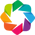

In [6]:
import caiman as cm
import matplotlib.pyplot as plt
from caiman.source_extraction import cnmf
from caiman.utils.utils import download_demo
from caiman.utils.visualization import inspect_correlation_pnr, nb_inspect_correlation_pnr
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf import params as params
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour
import cv2

import bokeh.plotting as bpl
import holoviews as hv
bpl.output_notebook()
hv.notebook_extension('bokeh')

In [22]:
# dataset dependent parameters
frate = 10                       # movie frame rate
decay_time = 0.4                 # length of a typical transient in seconds

# motion correction parameters
motion_correct = False    # flag for performing motion correction
pw_rigid = False         # flag for performing piecewise-rigid motion correction (otherwise just rigid)
gSig_filt = (3, 3)       # size of high pass spatial filtering, used in 1p data
max_shifts = (5, 5)      # maximum allowed rigid shift
strides = (48, 48)       # start a new patch for pw-rigid motion correction every x pixels
overlaps = (24, 24)      # overlap between pathes (size of patch strides+overlaps)
max_deviation_rigid = 3  # maximum deviation allowed for patch with respect to rigid shifts
border_nan = 'copy'      # replicate values along the boundaries
fnames = [path_input]
mc_dict = {
    'fnames': fnames,
    'fr': frate,
    'decay_time': decay_time,
    'pw_rigid': pw_rigid,
    'max_shifts': max_shifts,
    'gSig_filt': gSig_filt,
    'strides': strides,
    'overlaps': overlaps,
    'max_deviation_rigid': max_deviation_rigid,
    'border_nan': border_nan
}

opts = params.CNMFParams(params_dict=mc_dict)

### Motion Correction
The background signal in micro-endoscopic data is very strong and makes the motion correction challenging.
As a first step the algorithm performs a high pass spatial filtering with a Gaussian kernel to remove the bulk of the background and enhance spatial landmarks.
The size of the kernel is given from the parameter `gSig_filt`. If this is left to the default value of `None` then no spatial filtering is performed (default option, used in 2p data).
After spatial filtering, the NoRMCorre algorithm is used to determine the motion in each frame. The inferred motion is then applied to the *original* data so no information is lost.

The motion corrected files are saved in memory mapped format. If no motion correction is being performed, then the file gets directly memory mapped.

In [23]:
if motion_correct:
    # do motion correction rigid
    mc = MotionCorrect(fnames, dview=None, **opts.get_group('motion'))
    mc.motion_correct(save_movie=True)
    fname_mc = mc.fname_tot_els if pw_rigid else mc.fname_tot_rig
    if pw_rigid:
        bord_px = np.ceil(np.maximum(np.max(np.abs(mc.x_shifts_els)),
                                     np.max(np.abs(mc.y_shifts_els)))).astype(np.int)
    else:
        bord_px = np.ceil(np.max(np.abs(mc.shifts_rig))).astype(np.int)
        plt.subplot(1, 2, 1); plt.imshow(mc.total_template_rig)  # % plot template
        plt.subplot(1, 2, 2); plt.plot(mc.shifts_rig)  # % plot rigid shifts
        plt.legend(['x shifts', 'y shifts'])
        plt.xlabel('frames')
        plt.ylabel('pixels')

    bord_px = 0 if border_nan == 'copy' else bord_px
    print(f'mmap file saved to {fname_mc}')
    fname_new = cm.save_memmap(fname_mc, base_name='memmap_', order='C',
                               border_to_0=bord_px)
else:  # if no motion correction just memory map the file
    bord_px = 0
    print(f'mmap file saved to {fnames}')
    fname_new = cm.save_memmap(fnames, base_name='memmap_',
                               order='C', border_to_0=0, dview=None)

mmap file saved to ['F:\\case1 Movie_57_crop.tif']


### Load memory mapped file

In [24]:
# load memory mappable file
Yr, dims, T = cm.load_memmap(fname_new)
images = Yr.T.reshape((T,) + dims, order='F')

### Parameter setting for CNMF-E
We now define some parameters for the source extraction step using the CNMF-E algorithm.
We construct a new dictionary and use this to modify the *existing* `params` object,

In [25]:
# parameters for source extraction and deconvolution
p = 1               # order of the autoregressive system
K = None            # upper bound on number of components per patch, in general None
gSig = (3, 3)       # gaussian width of a 2D gaussian kernel, which approximates a neuron
gSiz = (13, 13)     # average diameter of a neuron, in general 4*gSig+1
Ain = None          # possibility to seed with predetermined binary masks
merge_thr = .7      # merging threshold, max correlation allowed
rf = 40             # half-size of the patches in pixels. e.g., if rf=40, patches are 80x80
stride_cnmf = 20    # amount of overlap between the patches in pixels
#                     (keep it at least large as gSiz, i.e 4 times the neuron size gSig)
tsub = 2            # downsampling factor in time for initialization,
#                     increase if you have memory problems
ssub = 1            # downsampling factor in space for initialization,
#                     increase if you have memory problems
#                     you can pass them here as boolean vectors
low_rank_background = None  # None leaves background of each patch intact,
#                     True performs global low-rank approximation if gnb>0
gnb = 0             # number of background components (rank) if positive,
#                     else exact ring model with following settings
#                         gnb= 0: Return background as b and W
#                         gnb=-1: Return full rank background B
#                         gnb<-1: Don't return background
nb_patch = 0        # number of background components (rank) per patch if gnb>0,
#                     else it is set automatically
min_corr = .8       # min peak value from correlation image
min_pnr = 5        # min peak to noise ration from PNR image
ssub_B = 2          # additional downsampling factor in space for background
ring_size_factor = 1.4  # radius of ring is gSiz*ring_size_factor

opts.change_params(params_dict={'method_init': 'corr_pnr',  # use this for 1 photon
                                'K': K,
                                'gSig': gSig,
                                'gSiz': gSiz,
                                'merge_thr': merge_thr,
                                'p': p,
                                'tsub': tsub,
                                'ssub': ssub,
                                'rf': rf,
                                'stride': stride_cnmf,
                                'only_init': True,    # set it to True to run CNMF-E
                                'nb': gnb,
                                'nb_patch': nb_patch,
                                'method_deconvolution': 'oasis',       # could use 'cvxpy' alternatively
                                'low_rank_background': low_rank_background,
                                'update_background_components': True,  # sometimes setting to False improve the results
                                'min_corr': min_corr,
                                'min_pnr': min_pnr,
                                'normalize_init': False,               # just leave as is
                                'center_psf': True,                    # leave as is for 1 photon
                                'ssub_B': ssub_B,
                                'ring_size_factor': ring_size_factor,
                               }
                  )

CNMFParams:

data:

{'caiman_version': '1.9.8',
 'decay_time': 0.4,
 'dims': (864, 845),
 'dxy': (1, 1),
 'fnames': ['F:\\case1 Movie_57_crop.tif'],
 'fr': 10,
 'last_commit': 'GITW-9715742891e7c9ca79df2600e5feb65f94e62e4e',
 'mmap_C': None,
 'mmap_F': None,
 'var_name_hdf5': 'mov'}

spatial_params:

{'block_size_spat': 5000,
 'dist': 3,
 'expandCore': array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]]),
 'extract_cc': True,
 'maxthr': 0.1,
 'medw': None,
 'method_exp': 'dilate',
 'method_ls': 'lasso_lars',
 'n_pixels_per_process': None,
 'nb': 0,
 'normalize_yyt_one': True,
 'nrgthr': 0.9999,
 'num_blocks_per_run_spat': 20,
 'se': None,
 'ss': None,
 'thr_method': 'nrg',
 'update_background_components': True}

temporal_params:

{'ITER': 2,
 'bas_nonneg': False,
 'block_size_temp': 5000,
 'fudge_factor': 0.96,
 'lags': 5,
 'memory_efficient': False,
 'method_deconvolution': 'oasis',
 'nb': 0,
 'noise_method': 'mean',


### Inspect summary images and set parameters
Check the optimal values of `min_corr` and `min_pnr` by moving slider in the figure that pops up. You can modify them in the `params` object.
Note that computing the correlation pnr image can be computationally and memory demanding for large datasets. In this case you can compute
only on a subset of the data (the results will not change). You can do that by changing `images[::1]` to `images[::5]` or something similar.
This will compute the correlation pnr image

In [26]:
# compute some summary images (correlation and peak to noise)
cn_filter, pnr = cm.summary_images.correlation_pnr(images[::10], gSig=gSig[0], swap_dim=False) # change swap dim if output looks weird, it is a problem with tiffile
# inspect the summary images and set the parameters
nb_inspect_correlation_pnr(cn_filter, pnr)

C:\Users\PC\mambaforge\envs\cz\lib\site-packages\caiman\summary_images.py:358: RuntimeWarning: divide by zero encountered in true_divide
  pnr = np.divide(data_max, data_std)
C:\Users\PC\mambaforge\envs\cz\lib\site-packages\caiman\summary_images.py:362: RuntimeWarning: divide by zero encountered in true_divide
  tmp_data = data_filtered.copy() / data_std


:Layout
   .AdjointLayout.Correlation :AdjointLayout
      :Image   [x,y]   (corr)
      :DynamicMap   []
         :Histogram   [corr]   (corr_count)
   .AdjointLayout.Pnr         :AdjointLayout
      :Image   [x,y]   (pnr)
      :DynamicMap   []
         :Histogram   [pnr]   (pnr_count)

You can inspect the correlation and PNR images to select the threshold values for `min_corr` and `min_pnr`. The algorithm will look for components only in places where these value are above the specified thresholds. You can adjust the dynamic range in the plots shown above by choosing the selection tool (third button from the left) and selecting the desired region in the histogram plots on the right of each panel.

In [27]:
# print parameters set above, modify them if necessary based on summary images
print(min_corr) # min correlation of peak (from correlation image)
print(min_pnr)  # min peak to noise ratio

0.8
5


### Run the CNMF-E algorithm

In [ ]:
st = perf_counter()
cnm = cnmf.CNMF(n_processes=6, dview=None, Ain=Ain, params=opts)
cnm.fit(images) # 15 min for resized
et = perf_counter()
dif = et - st
print(f"it takes {dif//60} min {dif % 60} s to complete.")

In [29]:
print(f"it takes {dif//60} min {dif % 60} s to complete.")

it takes 10.0 min 33.04308850000007 s to complete.


## Component Evaluation

The processing in patches creates several spurious components. These are filtered out by evaluating each component using three different criteria:

- the shape of each component must be correlated with the data at the corresponding location within the FOV
- a minimum peak SNR is required over the length of a transient
- each shape passes a CNN based classifier

<img src="../../docs/img/evaluationcomponent.png"/>
After setting some parameters we again modify the existing `params` object.

In [ ]:
# the components are evaluated in three ways:
#   a) the shape of each component must be correlated with the data
#   b) a minimum peak SNR is required over the length of a transient
#   c) each shape passes a CNN based classifier

min_SNR = 3  # adaptive way to set threshold on the transient size
r_values_min = 0.85  # threshold on space consistency (if you lower more components
#                        will be accepted, potentially with worst quality)
cnm.params.set('quality', {'min_SNR': min_SNR,
                           'rval_thr': r_values_min,
                           'use_cnn': False})
cnm.estimates.evaluate_components(images, cnm.params, dview=None)

print(' ***** ')
print('Number of total components: ', len(cnm.estimates.C))
print('Number of accepted components: ', len(cnm.estimates.idx_components))

### Do some plotting

In [ ]:
cnm.estimates.plot_contours_nb(img=cn_filter, idx=cnm.estimates.idx_components)

View traces of accepted and rejected components. Note that if you get data rate error you can start Jupyter notebooks using:
'jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10'

In [ ]:
# accepted components
cnm.estimates.hv_view_components(img=cn_filter, idx=cnm.estimates.idx_components,
                                denoised_color='red', cmap='gray')

In [ ]:
# rejected components
cnm.estimates.hv_view_components(img=cn_filter, idx=cnm.estimates.idx_components_bad,
                                denoised_color='red', cmap='gray')

In [ ]:
myidx = cnm.estimates.idx_components
print(len(myidx))

(x,y) = cnm.estimates.A.shape
print(y)

### Some instructive movies
Play the reconstructed movie alongside the original movie and the (amplified) residual

In [ ]:
# with background
cnm.estimates.play_movie(images, q_max=99.5, magnification=2,
                                 include_bck=True, gain_res=10, bpx=bord_px)

In [ ]:
# without background
cnm.estimates.play_movie(images, q_max=99.9, magnification=2,
                                 include_bck=False, gain_res=4, bpx=bord_px)

## Get all detected spatial components

In [ ]:
import numpy as np

(x, y) = cnm.estimates.A.shape
# the index of accepted components
myidx = cnm.estimates.idx_components

coordinate1 = np.reshape(cnm.estimates.A[:, myidx[1]].toarray(), dims, order='F')
bl = coordinate1 > 0

# setup blank merge arrays. One is from merge, the other is from overlapped areas
merged = np.where(bl == True, 0, coordinate1)
mhits = np.where(bl == True, 0, coordinate1)
blm = merged > 0

for i in myidx:
    coordinate2 = np.reshape(cnm.estimates.A[:, i].toarray(), dims, order='F')
    #%% generate boolean indexing
    bl2 = coordinate2 > 0
    ct2 = np.sum(bl2)
    blm = merged > 0
    # identify the overlapped components
    bli = np.logical_and(bl2, blm)
    cti = np.sum(bli)
    # calculate the portion of the overlapped
    percent = cti / ct2
    print(percent)
    if percent < 0.25:
        # change the label of this component
        merged = np.where(bl2 == True, i + 1, merged)
        # exclude the overlapped areas
        merged = np.where(bli == True, 0, merged)
    else:
        # put the overlapped areas here
        mhits = np.where(bli == True, 999 + i, mhits)

np.savetxt(r"E:/coor_merged.csv", merged, delimiter=",")
np.savetxt(r"E:/coor_mhits.csv", mhits, delimiter=",")

### Extract DF/F values

In [ ]:
(components,frames) = cnm.estimates.C.shape
print(frames)
cnm.estimates.detrend_df_f(quantileMin=8, frames_window=frames)
cnm.estimates

## Visualize components

In [ ]:
fpath_raw = r"E:/case1 Movie_57_c.tif"
image_raw = tifffile.imread(fpath_raw)
print(image_raw.shape)

In [ ]:
for i in range(92):
    roi = np.reshape(cnm.estimates.A[:, i].toarray(), dims, order='F')
    np.save(r"E:/roi_"+str(i)+".npy", roi)
def evaluate(x):
    ROI = np.reshape(cnm.estimates.A[:, x].toarray(), dims, order='F')
    y, x =  np.unravel_index(ROI.argmax(), ROI.shape)
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(ROI)
    plt.title("Original ROIs")
    plt.colorbar()
    plt.subplot(1, 2, 2)
    ROI_temp = ROI*255+image_raw[x]
    ROI_temp = cv2.rectangle(ROI_temp, (x, y), (x + 15, y + 15), (255,0,0), 4)
    plt.imshow(ROI_temp)
    plt.colorbar()
    plt.title("ROIs with original image overlay")
    plt.figure()
    plt.plot(cnm.estimates.C[x])
    plt.title("Intensity vs. Time")

In [ ]:
interact(evaluate, x=widgets.IntSlider(min=0, max=91, step=1, value=0))

## Save the estimates to local to save time for later processing

In [ ]:
# c = np.zeros_like(cnm.estimates.C)
# fname = 'caiman_out_slice'
# np.save(fname+'_overall.npy', c)
# for i in range(len(c)):
#     fname_i = fname + i + '.npy'
#     np.save(fname_i, c[i])

## reconstruct denoised movie
#### Note: 
If the following code returns error complaining about an nonexistent parameter called `compress`, that is due to library incompatibility issue. Change code under caiman library file to make the parameter from `compress` to `compression`, and rerun CalmAn all over again since relinking library will destroy all object data within the library class.

#### Details: The following file paths refer to your conda library path: For example, C:\Users\canying\\.conda\env\caiman\Lib\site-packages\
- Under `caiman/base/timeseries.py`, between line 173-191: `tif.write()` and `tif.save()` may complain parameter `compress`.
- Please make sure the parameter within your library is compatible with follows:
- In `tiffle/tiffle.py`, line 1440 and line 3084: The function may contain `compression` instead of `compress`. If this is the case, change code under `caiman/base/timeseries.py` from `compress=compress` to `compression=compress`.

In [ ]:
denoised = cm.movie(cnm.estimates.A.dot(cnm.estimates.C)).reshape(dims + (-1,), order='F').transpose([2, 0, 1])

In [ ]:
denoised.save('E:\\denoised.tif')